<a href="https://colab.research.google.com/github/abdullabasheer67/DECISION-TREE/blob/main/decision_tree_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [8]:
def importdata():
    balance_data = pd.read_csv("/content/lung_cancer.csv",header = 0)
    print("Dataset Length:", len(balance_data))
    print("Dataset Shape:", balance_data.shape)
    print("Dataset Head:\n", balance_data.head())
    return balance_data

In [16]:
def splitdataset(balance_data):
    X = balance_data.iloc[:, :-2].values
    Y = balance_data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test


In [17]:
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [18]:
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [19]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted Values:\n", y_pred)
    return y_pred

In [20]:
def cal_accuracy(y_test, y_pred):
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred) * 100)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [21]:
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

In [22]:
if __name__ == "__main__":

    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)


    print("\n----- Training Using Gini -----")
    clf_gini = train_using_gini(X_train, y_train)
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)


    print("\n----- Training Using Entropy -----")
    clf_entropy = train_using_entropy(X_train, y_train)
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

Dataset Length: 5000
Dataset Shape: (5000, 30)
Dataset Head:
    age  gender  education_years  income_level  smoker  smoking_years  \
0   60       1               20             2       1             16   
1   53       0               12             4       0              0   
2   62       1               15             3       1              9   
3   73       1               12             3       0              0   
4   52       1               13             1       0              0   

   cigarettes_per_day  pack_years  passive_smoking  air_pollution_index  ...  \
0                  15          12                0                   71  ...   
1                   0           0                1                   66  ...   
2                  29          13                1                   69  ...   
3                   0           0                0                   47  ...   
4                   0           0                0                   94  ...   

   bmi  oxygen_saturatio

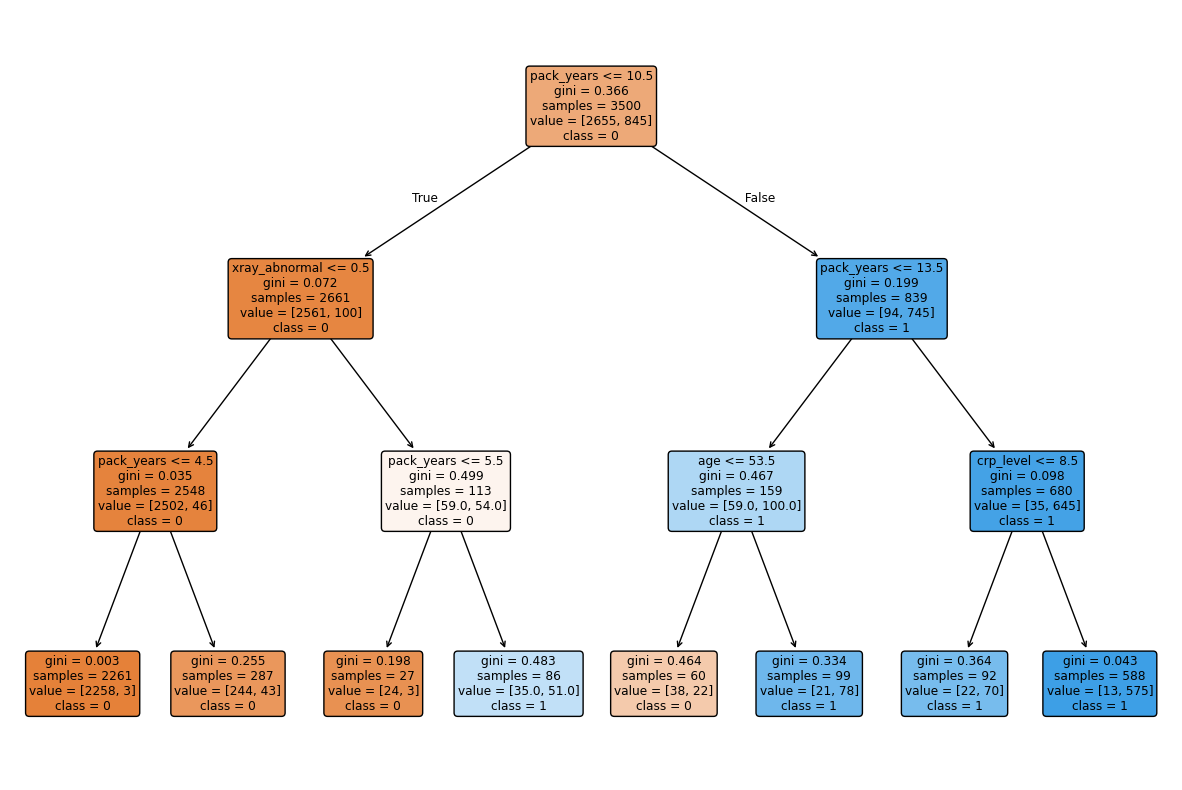

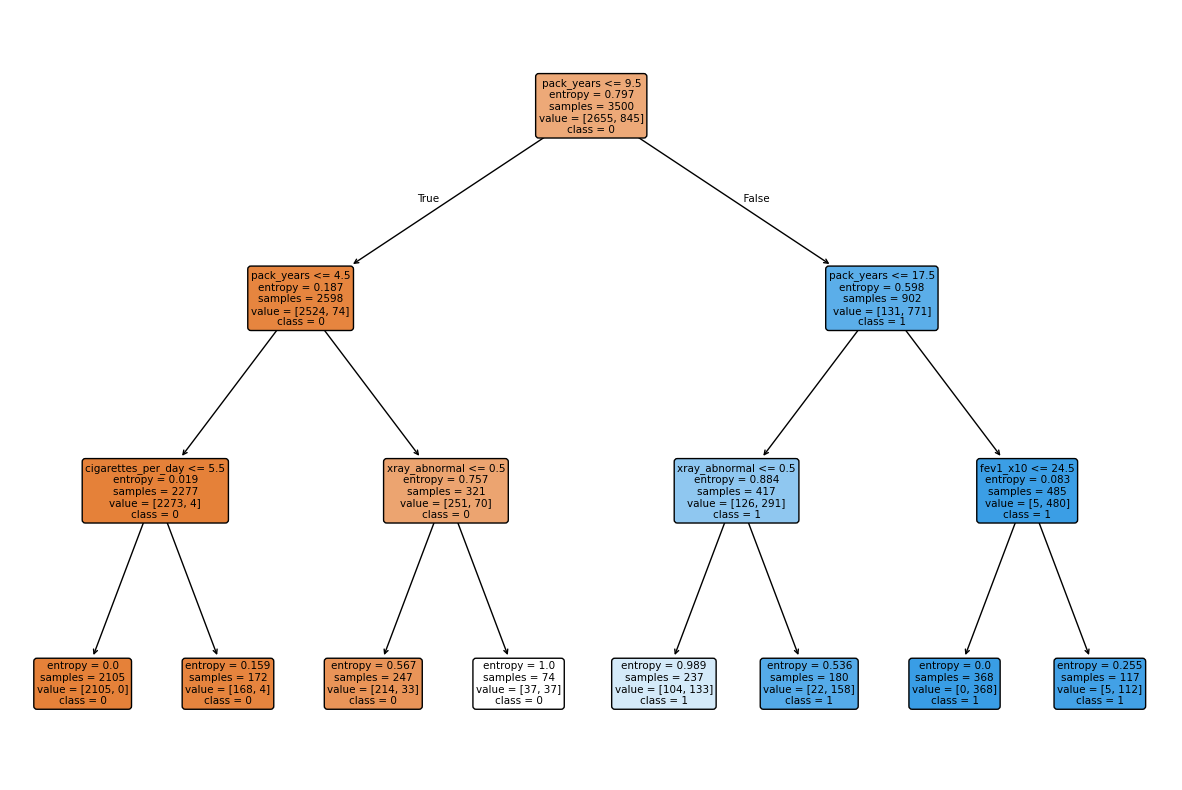

In [27]:
feature_names = ['age','gender','education_years','income_level','smoker','smoking_years','cigarettes_per_day','pack_years','passive_smoking','air_pollution_index','occupational_exposure','radon_exposure','family_history_cancer','copd','asthma','previous_tb','chronic_cough','chest_pain','shortness_of_breath','fatigue','bmi','oxygen_saturation','fev1_x10','crp_level','xray_abnormal','exercise_hours_per_week','diet_quality','alcohol_units_per_week','healthcare_access','lung_cancer_risk']
plot_decision_tree(clf_gini, feature_names , ['0','1'])

plot_decision_tree(clf_entropy, feature_names , ['0','1'])